In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#Read in data
full_train = pd.read_csv("PPP Train ALL.csv")
full_test = pd.read_csv("PPP Test ALL.csv")

In [3]:
#Set X and y dataframes
y = full_train['JobsRetained']
X = full_train.drop('JobsRetained', axis=1)

In [4]:
#Count Unique Values of Each Column
for colName, colValues in X.iteritems():
    print(colName + ": " + str(X[colName].nunique()))

Unnamed: 0: 3966377
BusinessType: 17
CD: 525
City: 33772
DateApproved: 79
Gender: 3
Lender: 4858
LoanRange: 10
NAICSCode: 1057
NonProfit: 2
RaceEthnicity: 9
State: 51
Veteran: 3
Zip: 35634
Industry: 1057
Index: 3966377


In [5]:
#Count Unique Values of Each Column
for colName, colValues in full_test.iteritems():
    print(colName + ": " + str(full_test[colName].nunique()))

Unnamed: 0: 350000
BusinessType: 16
CD: 463
City: 15557
DateApproved: 79
Gender: 3
Lender: 4564
LoanRange: 10
NAICSCode: 1056
NonProfit: 2
RaceEthnicity: 8
State: 51
Veteran: 3
Zip: 25008
Industry: 1056
Index: 350000


In [6]:
#Function to drop the columns we don't want
def dropColumns(df):
    df = df.drop('Unnamed: 0', axis=1)
    df = df.drop('Index', axis=1)
    df = df.drop('City', axis=1)
    df = df.drop('Lender', axis=1)
    df = df.drop('NAICSCode', axis=1)
    df = df.drop('CD', axis=1)
    df = df.drop('NonProfit', axis=1)
    df = df.drop('Industry', axis=1)
    df = df.drop('Veteran', axis=1)
    #df = df.drop('State', axis=1)
    df = df.drop('Zip', axis=1)
    #df = df.drop('DateApproved', axis=1)
    #df = df.drop('LoanRange', axis=1)
    #df = df.drop('Gender', axis=1)
    #df = df.drop('BusinessType', axis=1)
    #df = df.drop('RaceEthnicity', axis=1)
    
    return df

In [7]:
X = dropColumns(X)
X_final_test = dropColumns(full_test)

In [8]:
#Convert all categorical variables into dummy variables
X = pd.get_dummies(X)
X_final_test = pd.get_dummies(X_final_test)

In [9]:
# Get missing columns in the training test
missing_cols = set( X.columns ) - set( X_final_test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_final_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_final_test = X_final_test[X.columns]

In [10]:
print(X.head(2))

   BusinessType_Cooperative  BusinessType_Corporation  \
0                         0                         0   
1                         0                         0   

   BusinessType_Employee Stock Ownership Plan(ESOP)  \
0                                                 0   
1                                                 0   

   BusinessType_Independent Contractors  BusinessType_Joint Venture  \
0                                     1                           0   
1                                     0                           0   

   BusinessType_Limited  Liability Company(LLC)  \
0                                             0   
1                                             1   

   BusinessType_Limited Liability Partnership  \
0                                           0   
1                                           0   

   BusinessType_Non-Profit Childcare Center  \
0                                         0   
1                                         0   

   B

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.5943299147244074


In [15]:
pred = model.predict(X_test)
print(pred)

[24.54492188 10.44335938 13.23046875 ...  2.33789062  5.24023438
  5.06835938]


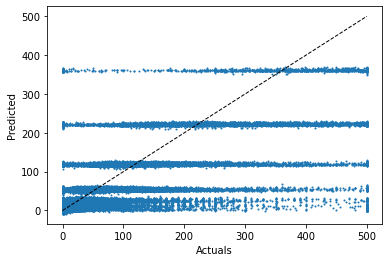

In [16]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred, s = 1)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
ax.set_xlabel('Actuals')
ax.set_ylabel('Predicted')
plt.show()

In [17]:
test_pred = model.predict(X_final_test)
test_pred = np.round(test_pred)
print(test_pred[:15])

[ 0.  3.  7.  3.  3.  5.  1.  2.  2.  3. 53.  9.  2.  0.  1.]


In [18]:
print(len(test_pred))

350000


In [21]:
submission_df = pd.DataFrame({'JobsRetained': test_pred})

In [22]:
submission_df.to_csv("submission3.csv", index=True, index_label='Index')